# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, we shall apply the regression analysis and diagnostics techniques covered in this section to a familiar "Boston Housing" dataset. We performed a detailed EDA for this dataset in earlier section and hence carry a good understanding of how this dataset is composed. This this lab we shall try to identify the predictive ability of some of features found in this dataset towards identifying house price. 

### Objectives:
You will be able to:
* Build many linear models with boston housing data set using OLS
* For each model, analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

Let's get started. 

### Import necessary libraries and load 'BostonHousing.csv' as pandas dataframe.

In [116]:
#pair work done with Larry & Sherry 

# import the libraries 

import numpy as np 
import pandas as pd 

In [117]:
#load the csv as pandas dataframe 
boston_housing_df = pd.read_csv('BostonHousing.csv')

#view the head of the df
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The data features and target are present as columns in boston data. Boston data gives a set of independent as independent variables in data and the housing rate as `MEDV` in target property. Also feature names are listed in feature_names. The desription is available at [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [118]:
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [119]:
# Record your observations here 
#floats
boston_housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [120]:
boston_housing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Create histograms for all variables in the dataset and comment on their shape (uniform or not ?)

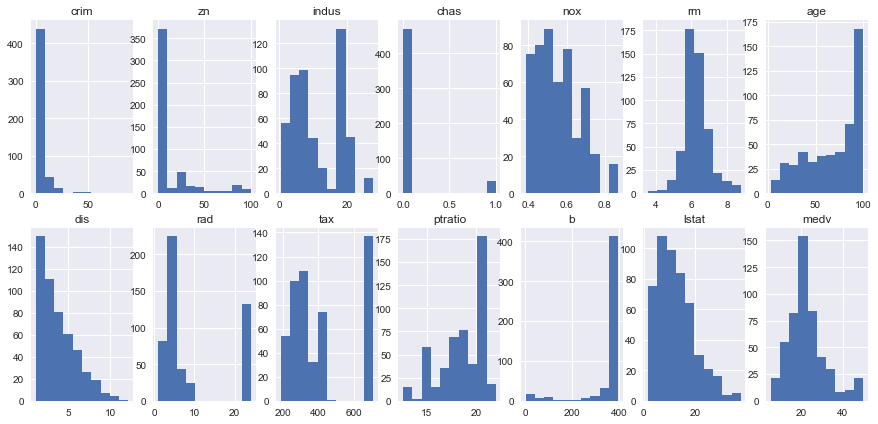

In [121]:
# Your code here 
import matplotlib.pyplot as plt
%matplotlib inline 

n_rows = 2
n_cols = 7 
fig,axes = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (15,7))

headers = boston_housing_df.columns 
counter = 0 
for i in range(n_rows): 
    for x in range(n_cols): 
        ax = axes[i][x]
        if counter < len(boston_housing_df.columns): 
            ax.hist(boston_housing_df[boston_housing_df.columns[counter]])
            ax.set_title(headers[counter])
        counter += 1
plt.show()

In [122]:
# Code check 
boston_housing_df.columns 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [123]:
# You observations here 
#rm is relatively normal, rm = 
#medv 
#Lstat

Based on this , we shall choose a selection of features which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [124]:
# Your code here
slice_df = boston_housing_df[['crim','dis','rm','zn','age','medv']]
slice_df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots and comment on the results

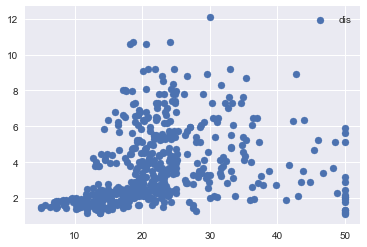

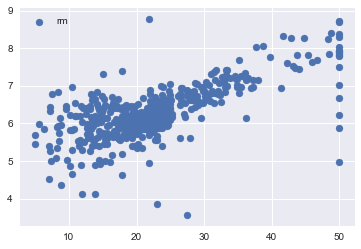

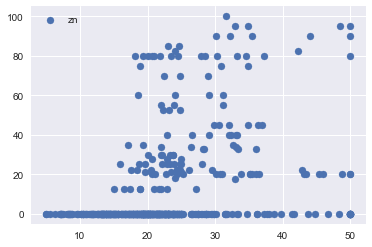

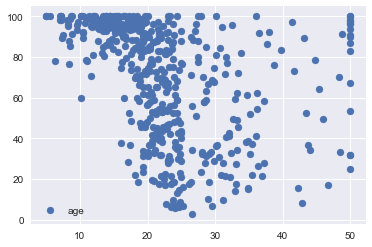

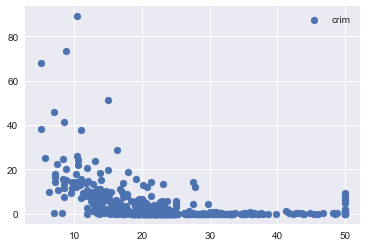

In [125]:
# Your code here 

plt.scatter(slice_df['medv'],slice_df['dis'])
plt.legend()
plt.show()
plt.scatter(slice_df['medv'], slice_df['rm'])
plt.legend()
plt.show()
plt.scatter(slice_df['medv'], slice_df['zn'])
plt.legend()
plt.show()
plt.scatter(slice_df['medv'],slice_df['age'])
plt.legend()
plt.show()
plt.scatter(slice_df['medv'],slice_df['crim'])
plt.legend()
plt.show()

In [126]:
# Your observations here 
#medv by rm is linear


Okie so obviously our data needs a lot of pre-procesing to improve the results. This key behind such kaggle competitions is to process the data in such a way that we can identify the relationships and make predictions in the best possible way. For now, we shall leave the dataset untouched and just move on with regression. So far, our assumptions, although not too strong, but still hold to a level that we can move on. 

### Let's do Regression 

Right here is the real deal. Let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). We shall do this is a loop and in every iteration, we shall pick one of the independent variables  perform following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`.
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [127]:
graph_df = slice_df[['rm','medv']]

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.17e-19
Time:                        17:34:14   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

/Users/sherzyang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/sherzyang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        17:34:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

/Users/sherzyang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/sherzyang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           1.57e-18
Time:                        17:34:15   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.0

/Users/sherzyang/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


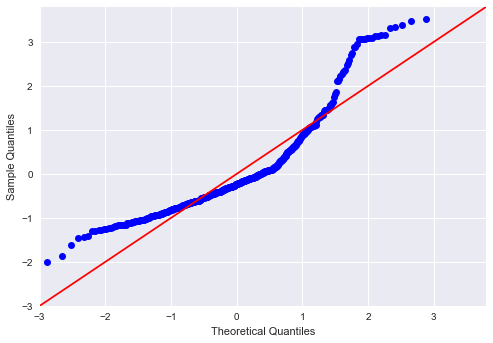

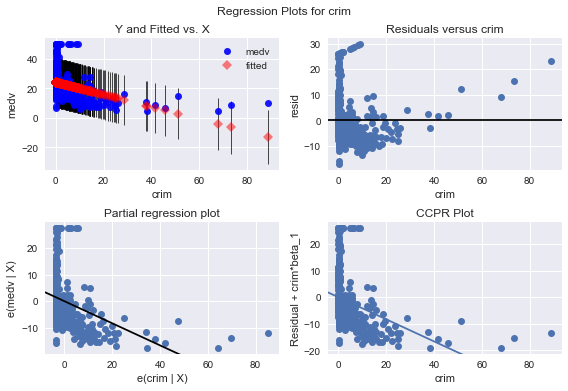

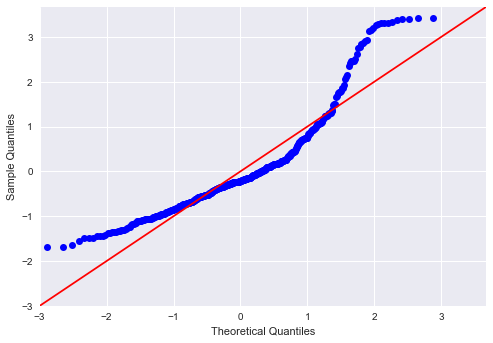

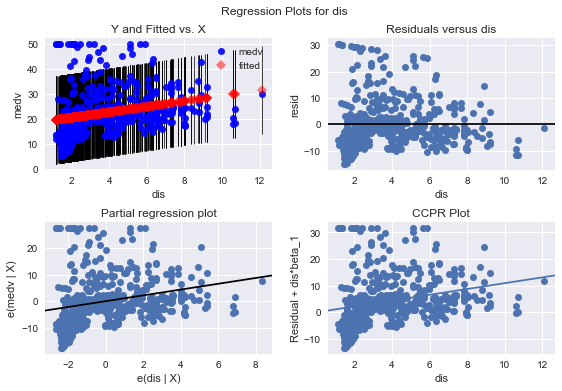

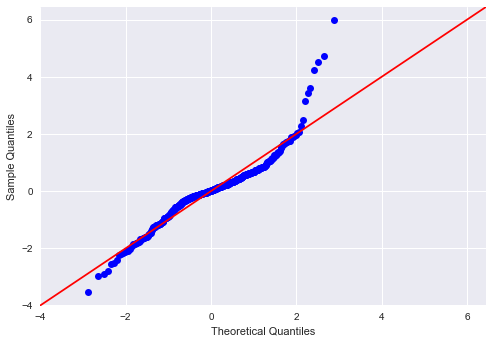

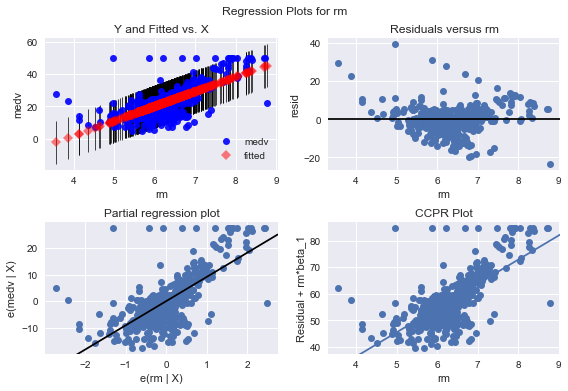

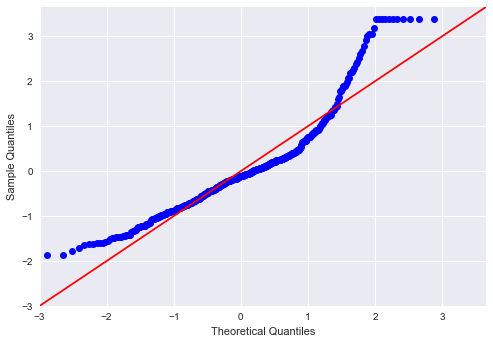

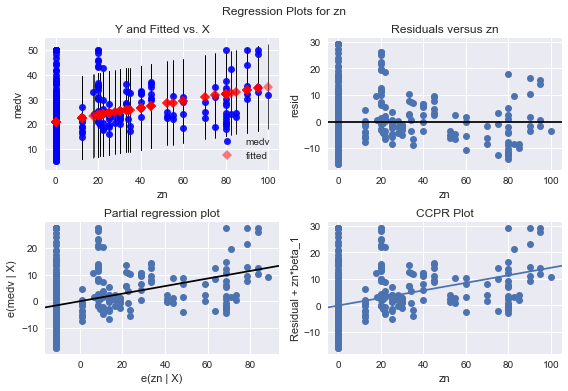

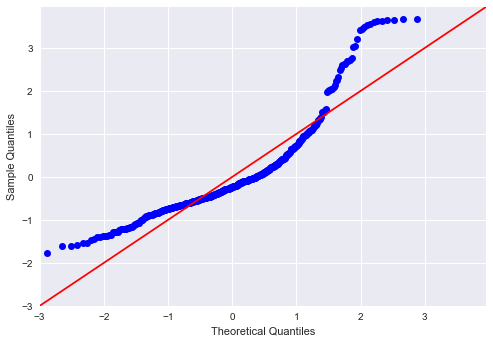

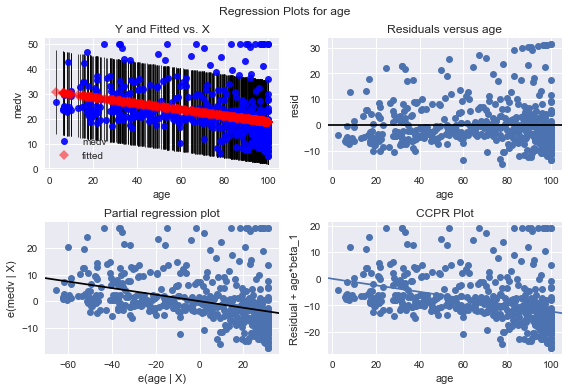

In [155]:
# Your code here
import statsmodels.api as sm
import statsmodels
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
plt.style.use('seaborn')

results = dict({'crim':{},'dis':{},'rm':{},'zn':{},'age':{}})
headers = ['crim','dis','rm','zn','age','medv']

for header in headers:
    if header == 'medv':
        pass 
    else: 
        graph_df = slice_df[[header,'medv']]
        f = f'medv~{header}'
        model = ols(formula=f,data=graph_df).fit()
        print(model.summary())
        
        results[header]["r_squared"]= model.rsquared 
        results[header]['p-value']= model.pvalues[1]
        results[header]['normality (JB)'] = stats.jarque_bera(graph_df)
        
        #plot QQ plot

        fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line = '45', fit = True)
        fig.show()
        
        #exog plot 
        regress_exog = sm.graphics.plot_regress_exog(model,header)

In [150]:
results

{'crim': {'r_squared': 0.15078046904975717,
  'p-value': 1.1739870821942348e-19,
  'normality (JB)': (272.4134760714317, 0.0)},
 'dis': {'r_squared': 0.062464372121782796,
  'p-value': 1.2066117273371135e-08,
  'normality (JB)': (192.30961311501935, 0.0)},
 'rm': {'r_squared': 0.4835254559913341,
  'p-value': 2.48722887100781e-74,
  'normality (JB)': (353.82210540625266, 0.0)},
 'zn': {'r_squared': 0.12992084489428946,
  'p-value': 5.713584153081099e-17,
  'normality (JB)': (1050.557407050292, 0.0)},
 'age': {'r_squared': 0.14209474407780465,
  'p-value': 1.569982209188055e-18,
  'normality (JB)': (123.68236886410591, 0.0)}}

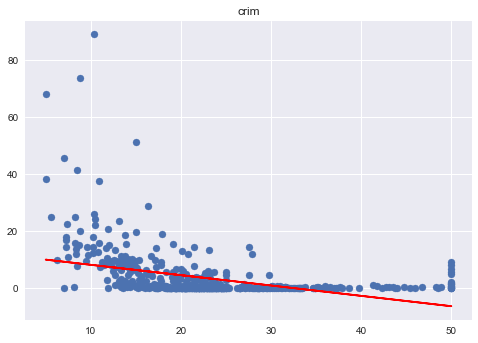

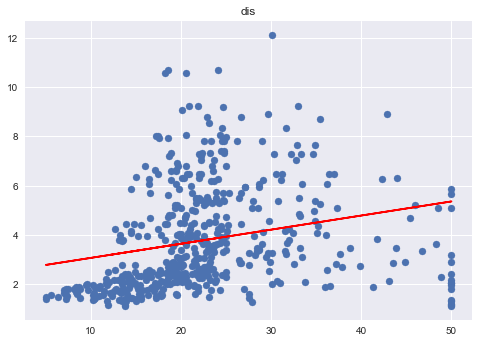

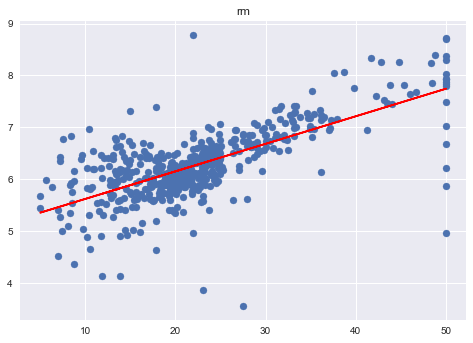

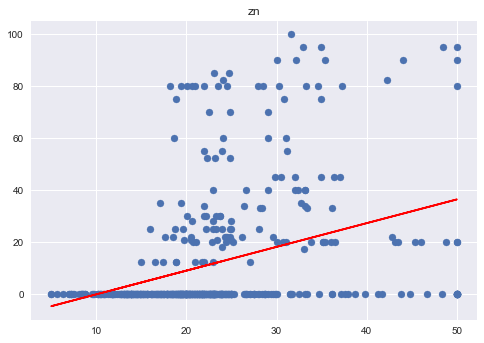

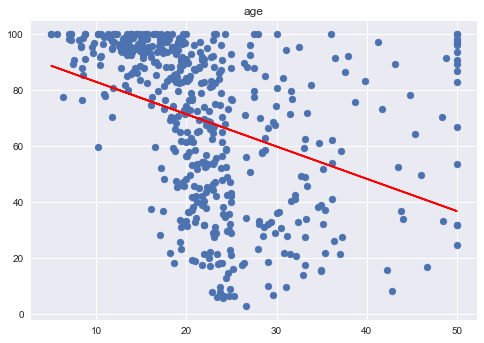

In [151]:
headers = ['crim','dis','rm','zn','age','medv']

for header in headers: 
    if header == 'medv': 
        pass 
    else: 
        graph_df = slice_df[[header,'medv']]
        m,b = np.polyfit(graph_df['medv'],graph_df[header],1)
        xs = graph_df['medv']
        ys = [m*x +b for x in graph_df['medv']]

        plt.scatter(graph_df['medv'],graph_df[header])
        plt.plot(xs,ys,color = 'red')
        plt.title(header)
        plt.show()
                
        results[header]["Independent_Variable"]= header 
        results[header]['slope']= m
        results[header]['intercept']= b

In [152]:
results

{'crim': {'r_squared': 0.15078046904975717,
  'p-value': 1.1739870821942348e-19,
  'normality (JB)': (272.4134760714317, 0.0),
  'Independent_Variable': 'crim',
  'slope': -0.36315992225760324,
  'intercept': 11.796535750221912},
 'dis': {'r_squared': 0.062464372121782796,
  'p-value': 1.2066117273371135e-08,
  'normality (JB)': (192.30961311501935, 0.0),
  'Independent_Variable': 'dis',
  'slope': 0.057222084397420346,
  'intercept': 2.5056685425580496},
 'rm': {'r_squared': 0.4835254559913341,
  'p-value': 2.48722887100781e-74,
  'normality (JB)': (353.82210540625266, 0.0),
  'Independent_Variable': 'rm',
  'slope': 0.05312235406004031,
  'intercept': 5.087638671836057},
 'zn': {'r_squared': 0.12992084489428946,
  'p-value': 5.713584153081099e-17,
  'normality (JB)': (1050.557407050292, 0.0),
  'Independent_Variable': 'zn',
  'slope': 0.9140344043653905,
  'intercept': -9.232123843502828},
 'age': {'r_squared': 0.14209474407780465,
  'p-value': 1.569982209188055e-18,
  'normality (JB

In [153]:
pd.DataFrame(results)

,crim,dis,rm,zn,age
Independent_Variable,crim,dis,rm,zn,age
intercept,11.7965,2.50567,5.08764,-9.23212,94.5713
normality (JB),"(272.4134760714317, 0.0)","(192.30961311501935, 0.0)","(353.82210540625266, 0.0)","(1050.557407050292, 0.0)","(123.68236886410591, 0.0)"
p-value,1.17399e-19,1.20661e-08,2.48723e-74,5.71358e-17,1.56998e-18
r_squared,0.15078,0.0624644,0.483525,0.129921,0.142095
slope,-0.36316,0.0572221,0.0531224,0.914034,-1.15372


In [ ]:
#our observations: 
#the p value for all is approx 0 
# there is more medv explained by rm, average number of rooms per dwelings, that 
    #has the highest r_squared value of the group 
#there is a neg correlation with crime & medv, age & medv
    #the neg corr for crime & medv means the more crime there is, the less the value 
    #the neg corr for age & medv means the higher prop of units built prior to 1940, the lower the value

So clearly the results are not highly reliable. the best good of fit i.e. r-squared is witnessed with `rm`. So clearly in this analysis this is our best predictor. 

---
#### So how can we improve upon these results . 
1. Pre-Processing 

This is where pre-processing of data comes in. Dealing with outliers, normalizing data, scaling values etc can help regression analysis get more meaningful results from the given set of data 

2. Advanced Analytical Methods

Simple regression is a very basic analysis techniques and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. In the next section we shall look at multiple regression where we can use multiple features **AT ONCE** to define a relationship with outcome. We shall also look at some pre-processing and data simplification techniques and re-visit the boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the the goodness of fit. 
![](https://i.pinimg.com/originals/e5/a5/1e/e5a51eff1b2133105ebaa9b779106ae2.png)

## Summary 

In this lab, we attempted to bring in all the skills learnt so far to a slighlt detailed dataset. We looked at the outcome of our analysis and realized that the data might need some pre-processing to see a clear improvement in results. We shall pick it up in the next section from this point and bring in data pre-processing techniques along with some assumptions that are needed for multiple regression . 